# Overview

Networks (a.k.a. graphs) are widely used mathematical objects for representing and analysing social systems. 
This week is about getting familiar with networks, and we'll focus on four main aspects:

* Basic mathematical description of networks
* The `NetworkX` library.
* Building the network of GME redditors.
* Basic analysis of the network of GME redditors.

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. You will watch some videos made by Sune for his course _Social Graphs and Interactions_, where he covers networks in details.  

> **_Video Lecture_**. Start by watching the ["History of Networks"](https://youtu.be/qjM9yMarl70). 


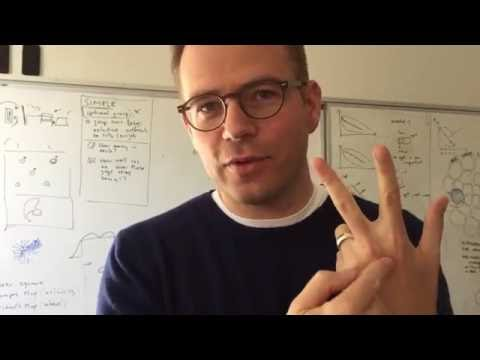

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("qjM9yMarl70",width=800, height=450)

> **_Video Lecture_**. Then check out a few comments on ["Network Notation"](https://youtu.be/MMziC5xktHs). 

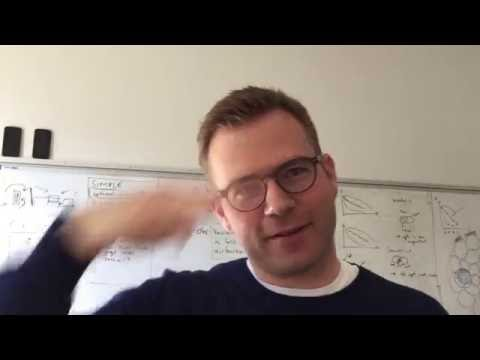

In [2]:
YouTubeVideo("MMziC5xktHs",width=800, height=450)

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://barabasi.com/networksciencebook/). 
> 
> * Read chapter 1\.
> * Read chapter 2\.
> 

> _Exercises_  
> _Chapter 1_ (Don't forget that you should be answering these in a Jupyter notebook.) 
> 
> * List three different real networks and state the nodes and links for each of them.
> * Tell us of the network you are personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 
> * In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 
> 
> _Chapter 2_
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
> 
> There are more questions on Chapter 2 below.
> 

**Exercise 1 - answers:** 

*1.1*:
> - Telephone network (nodes=people with phones, links=calls)
> - Energy grid (nodes=power plants, links=cables)
> - Protein interactions (nodes=proteins, links=binding interactions)

*1.2*:
> Language networks are quite cool.
> - Nodes are words (and eventually tags), links are relationships among words
> - Size of the network depends on the language that is investigated, e.g. Portuguese has approx. 818.000 words whereas Danish has approx. 200.000 words [link](https://en.wikipedia.org/wiki/List_of_dictionaries_by_number_of_words). 
> - It can indeed be mapped out as a graph. For instance, it could be done as a weighted adjacency matrix where weigths (link weigths) are co-occurrences of words.
> - I care about it because language is in constant evolution and because it is interesting to examine the history of lexicons and their flexibility. Also, it could be fun to remove links between words to see how the language network/model would function then.

*1.3*:
> In my view network science could have a big impact in the health industry - e.g. for intelligently designing new drugs to cure diseases that are currently hard to design without having side effects. Here network science will be both important to map out cellular networks and to develop analytical tools for patient and genetic data.

*2.2*:
> Yes, the real-world network of personal interactions. On average we interact with [80.000 people](https://www.quora.com/On-average-how-many-persons-do-we-know-during-our-lives) during our lives, yet we are [almost 7.9 billion people on earth](https://www.worldometers.info/world-population/). It is still sparse, because the network in general is scaled quite much - both in terms of node degrees and in terms of the total size of the network (sum of nodes). *Fun fact: the Dunbar limit states that we can only maintain 150 relations at once.*

# Part 2: Exercises using the `NetworkX` library

We will analyse networks in Python using the [NetworkX](https://networkx.org/) library. The cool thing about networkx is that it includes a lot of algorithms and metrics for analysing networks, so you don't have to code things from scratch. Get started by running the magic ``pip install networkx`` command. Then, get familiar with the library through the following exercises: 

>  *Exercises*:

> * Go to the NetworkX project's [tutorial page](https://networkx.org/documentation/stable/tutorial.html). The goal of this exercise is to create your own notebook that contains the entire tutorial. You're free to add your own (e.g. shorter) comments in place of the ones in the official tutorial - and change the code to make it your own where ever it makes sense.
> * Go to Section 2.12: [Homework](http://networksciencebook.com/chapter/2#homework2), then
>     * Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
>     * Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4 ... but I'll be impressed if you do it).
>     * Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

**Exercise 2 - answers:**

Below is the solution to the Homework from the book.

*2.1*:
> a) The graph has 4 nodes with links (1, 2), (1, 3), (1, 4), (2, 3), (3, 4). Only node 1 (left-side) and node 3 (right-side) has an uneven degree which means that the problem is solvable if we choose either 1 or 4 as respectively start- and end-node. 
> > **A solution could be: [1, 2, 3, 1, 4, 3].**

> b) The graph has 5 nodes with links (1, 2), (1, 5), (1, 4), (2, 3), (2, 5), (3, 4), (3, 5), (4, 5). Nodes follow the same labeling as in question a) and node number 5 is the center-one. All nodes except node 5 have a degree of 3, for which reason it is not solvable as the solution would require that maximum 2 nodes have an uneven degree.
> > **There is no solution.**

> c) The graph has 12 nodes that are either "inner" or "outer" nodes (pointy or more flat-like). The outer nodes have a degree of 2 and the inner nodes have a degree of 4. Thus, there are no nodes with uneven degree and no potential start- and stop-node.
> > **There is no solution.**

> d) The graph can be regarded as a multigraph with 6 nodes. The nodes with multi-edges (the middle ones with oval edges) have a degree of 6, whereas the "pointy" nodes forming the triangle have a degree of 2, except for the lower right node in the triangle that has a degree of 3. The node below this has a degree of 1. Thus, exactly 2 nodes have an uneven degree which makes the graph solvable. If we number the nodes from left-to-right with the end-node being the one with degree 1 (with number 6).
> > **A solution could be: [5, 4, 2, 4, 2, 4, 2, 1, 3, 5, 6].**

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 1,
}

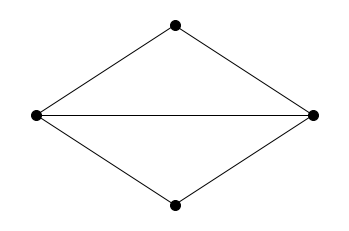

In [4]:
# Exercise 2.1 - example
edgelist = [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3)]
A = nx.Graph(edgelist)

plt.subplot(111)
nx.draw_shell(A, nlist=[range(4)], **options)

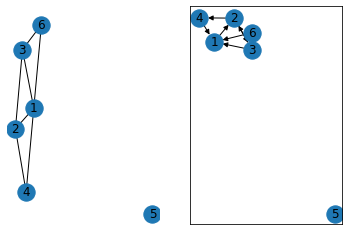

In [5]:
# Exercise 2.3

nodes = [1, 2, 3, 4, 5, 6]

# construct undirected
edgelist = [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]
A = nx.Graph()
A.add_nodes_from(nodes)
A.add_edges_from(edgelist)

# construct directed graph
edgelist = [(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)]
B = nx.DiGraph()
B.add_nodes_from(nodes)
B.add_edges_from(edgelist)

# plot undirected
plt.subplot(121)
nx.draw(A, with_labels=True)

# plot directed
plt.subplot(122)
pos = nx.spring_layout(B)
nx.draw_networkx_nodes(B, pos)
nx.draw_networkx_labels(B, pos)
nx.draw_networkx_edges(B, pos)

plt.show()

In [6]:
def print_adjaceny_and_list(nx_Graph, graph_name=None):
    nodelist = np.arange(1, nx_Graph.nodes().__len__()+1)
    adjacency_matrix = nx.adjacency_matrix(nx_Graph, nodelist=nodelist).todense()
    
    print(f"Adjacency Matrix ({graph_name}):")
    print(adjacency_matrix)
    
    print(f"\nLink-list (for undirected {graph_name} graph):\n {list(nx_Graph.edges)}")
    
    print(f"\nAverage clustering coefficient ({graph_name} graph) = {nx.average_clustering(nx_Graph) :.3f}")


In [7]:
print_adjaceny_and_list(A, graph_name='A')

Adjacency Matrix (A):
[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

Link-list (for undirected A graph):
 [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]

Average clustering coefficient (A graph) = 0.639


In [8]:
print_adjaceny_and_list(B, graph_name='B')

Adjacency Matrix (B):
[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

Link-list (for undirected B graph):
 [(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)]

Average clustering coefficient (B graph) = 0.322


In [9]:
mapping = {5: 6, 6: 5}
A_switch = nx.relabel_nodes(A, mapping)
B_switch = nx.relabel_nodes(B, mapping)

In [10]:
print_adjaceny_and_list(A_switch, graph_name='A - switch 5 with 6')

Adjacency Matrix (A - switch 5 with 6):
[[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]

Link-list (for undirected A - switch 5 with 6 graph):
 [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5)]

Average clustering coefficient (A - switch 5 with 6 graph) = 0.639


In [11]:
print_adjaceny_and_list(B_switch, graph_name='B (switch 5 with 6)')

Adjacency Matrix (B (switch 5 with 6)):
[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]

Link-list (for undirected B (switch 5 with 6) graph):
 [(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (5, 1), (5, 3)]

Average clustering coefficient (B (switch 5 with 6) graph) = 0.322


In [12]:
def number_of_path_with_length(nx_Graph, start_node, end_node, path_length, graph_name=None):
    # all paths with length 3 between node 1 and 3 with repetitions allowed
    # this means that we have to visit 4 nodes (3 edges) or go directly between
    # the 2 nodes where we can then repeat the 1 edges 3 times
    number = 0
    print(f"Paths with length {path_length} on graph {graph_name}:")
    for path in nx.all_simple_paths(nx_Graph, source=1, target=3):
        if (path.__len__() % 2) == 0:
            print(path)
            number +=1

    print(f"\nNumber of paths between {start_node} and {end_node} with length {path_length} (repetitions allowed): {number}")

In [13]:
number_of_path_with_length(A, start_node=1, end_node=3, 
                           path_length=3, graph_name='A')

Paths with length 3 on graph A:
[1, 3]
[1, 4, 2, 3]

Number of paths between 1 and 3 with length 3 (repetitions allowed): 2


In [14]:
number_of_path_with_length(B, start_node=1, end_node=3, 
                           path_length=3, graph_name='B')

Paths with length 3 on graph B:

Number of paths between 1 and 3 with length 3 (repetitions allowed): 0


In [15]:
# Exercise 2.5 - Bipartite networks
B = nx.Graph()

# add nodes
B.add_nodes_from([1, 2, 3, 4, 5, 6], bipartite=0)
B.add_nodes_from([7, 8, 9, 10, 11], bipartite=1)

# add edges  between nodes of opposite sets
B.add_edges_from([(1, 7), (2, 9), (3, 7), (3, 8), (3, 9), (4, 9), (4, 10), (5, 9), (5, 11), (6, 11)])

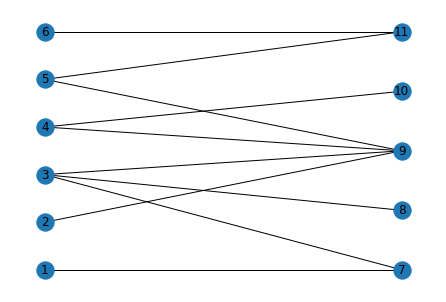

In [16]:
# draw graph
top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)

nx.draw(B, pos, with_labels=True)

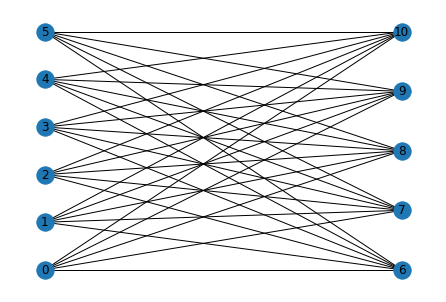

In [17]:
# plot fully connected graph
fully_connected_bipartite = nx.complete_bipartite_graph(6, 5)

top = nx.bipartite.sets(fully_connected_bipartite)[0]
pos = nx.bipartite_layout(fully_connected_bipartite, top)

nx.draw(fully_connected_bipartite, pos, with_labels=True)

In [18]:
# compute maximum number of links the network can have
L_max_bipartite = fully_connected_bipartite.edges.__len__()
print(f"Maximum number of links: {L_max_bipartite}")

Maximum number of links: 30


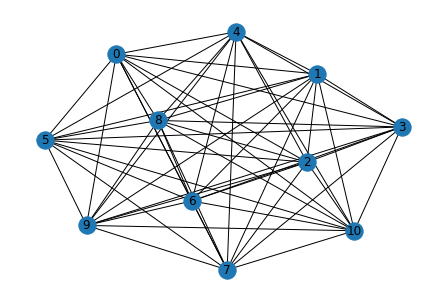

In [19]:
# drawing fully connected without being bipartite
fully_connected = nx.complete_graph(6+5)

nx.draw(fully_connected, with_labels=True)

In [20]:
# compute maximum number of links the network can have
L_max = fully_connected.edges.__len__()
print(f"Maximum number of links: {L_max}")

print(f"\nNumber of links that cannot occur in bipartite: {L_max - L_max_bipartite}")

Maximum number of links: 55

Number of links that cannot occur in bipartite: 25


In [21]:
# since N1 << N2 the network density will be quite low. Actually, since it is more or less half 
# the size of the fully connected network, the density will be twice as low

**Answer:** 

If we say that $s_1$ and $s_2$ are respectively the sum of degrees for each side of the bipartite network. $s_1 = s_2 = L$. We can compute the average degree of each side as:

$$
\langle k_1 \rangle = \frac{s_1}{N_1}
$$

$$
\langle k_1 \rangle = \frac{s_1}{N_1}
$$

$$
N_1 \langle k_1 \rangle = N_2 \langle k_2 \rangle
$$

# Part 3: Building the GME redditors network

Ok, enough with theory :) It is time to go back to our cool dataset it took us so much pain to download! And guess what? We will build the network of GME Redditors. Then, we will use some Network Science to study some of its properties.


> 
> *Exercise*: Build the network of Redditors discussing about GME on r\wallstreetbets. In this network, nodes correspond to authors of comments, and a direct link going from node _A_ to node _B_ exists if _A_ ever answered a submission or a comment by _B_. The weight on the link corresponds to the number of times _A_ answered _B_. You can build the network as follows:
>
> 1. Open the _comments dataset_ and the _submission datasets_ (the first contains all the comments and the second cointains all the submissions) and store them in two Pandas DataFrames.
> 2. Create three dictionaries, using the command ``dict(zip(keys,values))``, where keys and values are columns in your dataframes. The three dictionaries are the following:
>     * __comment_authors__: (_comment id_, _comment author_)
>     * __parent__:  (_comment id_ , _parent id_)
>     * __submission_authors__: (_submission id_, _submission author_)
>
> where above I indicated the (key, value) tuples contained in each dictionary.
>
> 3. Create a function that take as input a _comment id_ and outputs the author of its parent. The function does two things:
>     * First, it calls the dictionary __parent__, to find the _parent id_ of the comment identified by a given _comment id_. 
>     * Then, it finds the author of  _parent id_. 
>          * if the _parent id_ starts with "t1_", call the __comment_authors__ dictionary (for key=parent_id[3:])
>          * if the _parent id_ starts with "t3_", call the __submission_authors__ dictionars (for key=parent_id[3:])
>
> where by parent_id[3:], I mean that the first three charachters of the _parent id_ (either "t1_" or "t3_" should be ingnored).
>
> 4. Apply the function you created in step 3. to all the comment ids in your comments dataframe. Store the output in a new column, _"parent author"_, of the comments dataframe. 
> 5. For now, we will focus on the genesis of the GME community on Reddit, before all the hype started and many new redditors jumped on board. For this reason, __filter all the comments written before Dec 31st, 2020__. Also, remove deleted users by filtering all comments whose author or parent author is equal to "[deleted]". 
> 6. Create the weighted edge-list of your network as follows: consider all comments (after applying the filtering step above), groupby ("_author_", _"parent author"_) and count. 
> 7. Create a [``DiGraph``](https://networkx.org/documentation/stable//reference/classes/digraph.html) using networkx. Then, use the networkx function [``add_weighted_edges_from``](https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.DiGraph.add_weighted_edges_from.html) to create a weighted, directed, graph starting from the edgelist you created in step 5.
> 8. Save the Network as a json file. 

In [28]:
import os
import pandas as pd
from tqdm.notebook import tqdm
import datetime
import networkx as nx

# specify data path
DATA_DIR = (os.sep).join(os.path.dirname(os.getcwd()).split(os.sep)[:-1]+['data'])
comments_filename = f'reddit{os.sep}reddit_comments.bz2'
submissions_filename = f'reddit{os.sep}reddit_submissions.bz2'

# load data
comments = pd.read_pickle(f'{DATA_DIR}{os.sep}{comments_filename}')
submissions = pd.read_pickle(f'{DATA_DIR}{os.sep}{submissions_filename}')

In [29]:
# create dictionaries
comment_authors = dict(zip(comments.id, comments.author))
parent = dict(zip(comments.id, comments.parent_id))
submission_authors = dict(zip(submissions.id, submissions.author))

In [30]:
def parent_author(comment_id, comment_authors=comment_authors, parent=parent, submission_authors=submission_authors):
    '''Links the comment id to the author of its parent.
    
    input: comment_id
    returns: author'''
    
    parent_id = parent[comment_id]
    
    try: # try to look for the parent_id key
        if parent_id[:3] == 't1_':
            return comment_authors[parent_id[3:]]
        if parent_id[:3] == 't3_':
            return submission_authors[parent_id[3:]]    
    except KeyError: # if parent_id was not extracted in comments or submissions
        return np.nan

In [31]:
parent_author = pd.Series([parent_author(comment_id) for comment_id in tqdm(comments.id)])

  0%|          | 0/636641 [00:00<?, ?it/s]

In [32]:
print(f"Number of IDs that could not be extracted: {parent_author.isnull().sum()}/{parent_author.__len__()} = {parent_author.isnull().sum() / parent_author.__len__() :.4f}")

Number of IDs that could not be extracted: 18409/636641 = 0.0289


In [33]:
# update dataframe
comments.reset_index(inplace=True)
comments['parent_author'] = parent_author

# remove nans and update index
comments.dropna(inplace=True)
comments.set_index(np.arange(comments.__len__()), inplace=True)

# show data
print(comments.shape)
comments.head()

(618232, 9)


,date,id,submission_id,score,author,parent_id,comment,created_time,parent_author
0,2022-01-01,hqub8n7,t3_eick65,1,[deleted],t1_fcr10e4,[removed],2022-01-01 19:50:31,nikhilper
1,2021-12-21,hpdcbar,t3_eick65,1,CutoffThought,t1_hmhijv0,Always come back to reminisce of the golden days,2021-12-21 01:42:30,smash-smash-SUHMASH
2,2021-12-04,hn8rsm7,t3_eick65,2,NosikaOnline,t1_fcp6g5b,Damn,2021-12-04 21:36:21,DeepFuckingValue
3,2021-11-29,hmhijv0,t3_eick65,1,smash-smash-SUHMASH,t1_fcr10e4,i would love to know how that short worked out...,2021-11-29 03:13:30,nikhilper
4,2021-11-28,hmf9x9l,t3_eick65,1,[deleted],t1_fcspmtp,[removed],2021-11-28 17:48:46,nikhilper


In [34]:
# filter comments and remove rows with deleted users
filtered_comments = comments[comments.date < datetime.date(2020, 12, 31)]
deleted_users_idx = np.logical_or(filtered_comments.author == '[deleted]', filtered_comments.parent_author == '[deleted]')
filtered_comments = filtered_comments[-deleted_users_idx]

# update index
filtered_comments.set_index(np.arange(filtered_comments.__len__()), inplace=True)
print(filtered_comments.shape)
filtered_comments.head()

(113384, 9)


,date,id,submission_id,score,author,parent_id,comment,created_time,parent_author
0,2020-01-14,fecc3bh,t3_eick65,1,DeepFuckingValue,t1_fec8az4,Nothing too alarming in there - no major threa...,2020-01-14 02:54:44,satago
1,2020-01-14,fec8az4,t3_eick65,1,satago,t1_fdsuh9d,"I've been playing that range as well, rinse an...",2020-01-14 02:19:57,DeepFuckingValue
2,2020-01-11,fdsuh9d,t3_eick65,1,DeepFuckingValue,t1_fdrtctw,What volatility? It’s been trading in an impre...,2020-01-11 02:01:37,toxicapplejuice
3,2020-01-10,fdrtctw,t3_eick65,1,toxicapplejuice,t3_eick65,Thoughts on recent volatility? seems suspiciou...,2020-01-10 20:51:28,DeepFuckingValue
4,2020-01-04,fd27r0x,t3_eick65,1,DeepFuckingValue,t1_fd0dgds,I bought more.,2020-01-04 13:03:34,FabulousResearch


In [35]:
print(f"Number of deleted users: {deleted_users_idx.sum()}")

Number of deleted users: 5290


In [36]:
# computing the weighted edgelist by counting - using score as a randomly picked attributed to obtain a single pd.Series
weighted_edgelist = filtered_comments.groupby(by=['author', 'parent_author']).count().score.reset_index().rename(columns={'score':'weight'})
weighted_edgelist.head(10)

,author,parent_author,weight
0,----The_Truth-----,Ackilles,1
1,----The_Truth-----,BellevueTrader,1
2,----The_Truth-----,BorpleFlorpleWho,1
3,----The_Truth-----,CD2471,1
4,---MrP---,Nasty_Nate2324,1
5,---MrP---,Uberkikz11,2
6,---MrP---,sneakersourcerer,1
7,---MrP---,uhohsea,3
8,---Tim---,CommanderLeona,1
9,---Tim---,danielbauwens,1


In [37]:
(weighted_edgelist.weight > 1).any()

True

In [38]:
# reformat weighted edgelist to 3-tuples
edgelist = list(zip(weighted_edgelist.author, weighted_edgelist.parent_author, weighted_edgelist.weight))

# construct graph
reddit_graph = nx.DiGraph()
reddit_graph.add_weighted_edges_from(edgelist)

Examples of the edge-weights:

In [39]:
# get weight of edge of first link
reddit_graph.get_edge_data('----The_Truth-----', 'Ackilles')

{'weight': 1}

In [40]:
# get weight of edge of first link that is not 1
non_uniform_weight_idx = np.where(weighted_edgelist.weight > 1)[0][0]
nodes = weighted_edgelist.iloc[non_uniform_weight_idx, 0], weighted_edgelist.iloc[non_uniform_weight_idx, 1]
print(nodes)

reddit_graph.get_edge_data(nodes[0], nodes[1])

('---MrP---', 'Uberkikz11')


{'weight': 2}

In [41]:
# save graph as json
from networkx.readwrite import json_graph
import json

# specify save location
filename = f'{DATA_DIR}{os.sep}RedditGraph.json'
data = json_graph.node_link_data(reddit_graph)

# write as a json
with open(filename, 'w') as f:
    json.dump(data, f)

In [42]:
# function taken from: https://stackoverflow.com/questions/34665042/read-json-graph-networkx-file

def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

G = read_json_file(filename)

# Part 4: Preliminary analysis of the GME redditors network

We begin with a preliminary analysis of the network.

> 
> *Exercise: Basic Analysis of the Redditors Network*
> * Why do you think I want you guys to use a _directed_ graph? Could have we used an undirected graph instead?
> * What is the total number of nodes in the network? What is the total number of links? What is the density of the network (the total number of links over the maximum number of links)?
> * What are the average, median, mode, minimum and maximum value of the in-degree (number of incoming edges per redditor)? And of the out-degree (number of outgoing edges per redditor)? How do you intepret the results?
> * List the top 5 Redditors by in-degree and out-degree. What is their average score over time? At which point in time did they join the discussion on GME? When did they leave it?
> * Plot the distribution of in-degrees and out-degrees, using a logarithmic binning (see last week's exercise 4). 
> * Plot a scatter plot of the the in- versus out- degree for all redditors. Comment on the relation between the two.
> * Plot a scatter plot of the the in- degree versus average score for all redditors. Comment on the relation between the two.


**Exercise 4 - answers:**

> -
> -
> -
> -
> -
> -
> -